# **Sales Forecasting**

**Name: Radyatra Sidharta**

### Table of Contents
- I. Introduction
- II. External Links
- III. Working Area
    - a. Library Import
    - b. Exploratory Data Analysis (EDA)
    - c. Feature Engineering
    - d. Forecasting
        - 1. Product A1
        - 2. Product A2
        - 3. Product B1
        - 4. Product B2
- IV. Conclusion

## I. Introduction

The purpose of this notebook is to create a time series model with the following criteria:

- Able to forecast 14 days every products and categories from Kalbe’s dataset.
- Your working model able to reach a good Accuracy Rate.
- Able to explain the methodology used for every step, algorithm, data manipulation, data cleansing, etc.
- Able to provide chart or any other measureable methods to prove your inferences.

## II. External Links

- linkedin.com/in/radyatra-sidharta
- github.com/Radyatra

## III. Working Area

### a. Library Import

In [1]:
# Define Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

np.random.seed(42)

### b. Exploratory Data Analysis (EDA)

In [2]:
xls = pd.ExcelFile('kalbe_data.xlsx')
dfA1 = pd.read_excel(xls, 'A1')
dfA2 = pd.read_excel(xls, 'A2')
dfB1 = pd.read_excel(xls, 'B1')
dfB2 = pd.read_excel(xls, 'B2')

The Excel data contains four sheets and its contents can be seen below. Here, we have columns such as Day, Category, Product, Sales and Event (only for Product B1). Note, there are two Categories "A" and "B" and four Products "A1", "A2", "A3", and "A4." The Sales data will be seperated into their respective Products.

In [3]:
dfA1

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401
...,...,...,...,...
85,86,A,A1,196.980000
86,87,A,A1,197.964900
87,88,A,A1,198.954724
88,89,A,A1,199.949498


It is important to check for Not-a-Number (NaN) / Nulls and duplicates in the data to ensure the model will run properly and to increase its performance (by mitigating noise).

In [4]:
dfA1.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

In [5]:
# Finding duplicates in our data and sorting them (True will be on top of the list).
A1_dupl = dfA1.duplicated()
A1_dupl.sort_values(ascending=False) 

0     False
67    False
65    False
64    False
63    False
      ...  
28    False
27    False
26    False
25    False
89    False
Length: 90, dtype: bool

There 90 data entries and four columns in A1 dataset, without a Not-a-Number (NaN) / Null and duplicates present in the data.

In [6]:
dfA2

,Day,Category,Product,Sales
0,1,A,A2,1000.000000
1,2,A,A2,1005.000000
2,3,A,A2,1010.025000
3,4,A,A2,1015.075125
4,5,A,A2,1020.150501
...,...,...,...,...
85,86,A,A2,1527.971484
86,87,A,A2,1535.611342
87,88,A,A2,1543.289398
88,89,A,A2,1551.005845


In [7]:
dfA2.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

In [8]:
A2_dupl = dfA2.duplicated()
A2_dupl.sort_values(ascending=False) 

0     False
67    False
65    False
64    False
63    False
      ...  
28    False
27    False
26    False
25    False
89    False
Length: 90, dtype: bool

There 90 data entries and four columns in A2 dataset, with no Not-a-Number (NaN) / Null and duplicates present in the data.

In [9]:
dfB1

,Day,Category,Product,Sales,Event
0,1,B,B1,990.0,0
1,2,B,B1,980.0,0
2,3,B,B1,1010.0,0
3,4,B,B1,1010.0,0
4,5,B,B1,1000.0,0
...,...,...,...,...,...
99,100,B,B1,NaN,0
100,101,B,B1,NaN,1
101,102,B,B1,NaN,0
102,103,B,B1,NaN,0


In [10]:
dfB1.isnull().sum()

Day          0
Category     0
Product      0
Sales       14
Event        0
dtype: int64

In [11]:
B1_dupl = dfB1.duplicated()
B1_dupl.sort_values(ascending=False) 

0      False
1      False
76     False
75     False
74     False
       ...  
31     False
30     False
29     False
28     False
103    False
Length: 104, dtype: bool

There 104 data entries and five columns in B1 dataset, with 14 Not-a-Number (NaN) / Null present at the end of the dataset in the column "Sales" and no duplicates.

In [12]:
dfB2

,Day,Category,Product,Sales
0,1,B,B2,NaN
1,2,B,B2,NaN
2,3,B,B2,NaN
3,4,B,B2,NaN
4,5,B,B2,NaN
...,...,...,...,...
99,100,B,B2,NaN
100,101,B,B2,NaN
101,102,B,B2,NaN
102,103,B,B2,NaN


In [13]:
dfB2.isnull().sum()

Day          0
Category     0
Product      0
Sales       74
dtype: int64

In [14]:
B2_dupl = dfB2.duplicated()
B2_dupl.sort_values(ascending=False) 

0      False
1      False
76     False
75     False
74     False
       ...  
31     False
30     False
29     False
28     False
103    False
Length: 104, dtype: bool

There 104 data entries and four columns in B2 dataset, with 74 Not-a-Number (NaN) / Null present in the head and tail of the column "Sales" and no duplicates in the data.

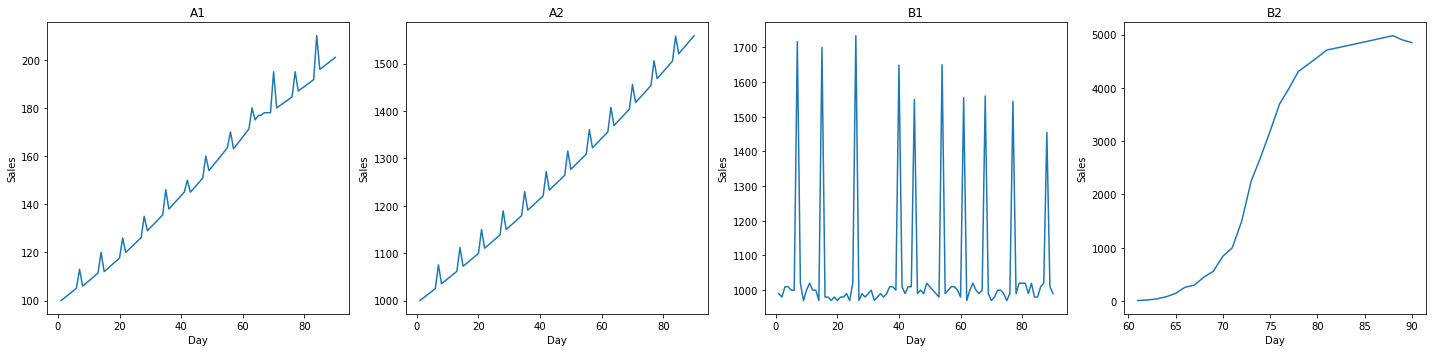

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.lineplot(y='Sales', x='Day', data=dfA1)
plt.title('A1')

plt.subplot(1,4,2)
sns.lineplot(y='Sales', x='Day', data=dfA2)
plt.title('A2')

plt.subplot(1,4,3)
sns.lineplot(y='Sales', x='Day', data=dfB1)
plt.title('B1')

plt.subplot(1,4,4)
sns.lineplot(y='Sales', x='Day', data=dfB2)
plt.title('B2')

plt.tight_layout()

plt.show()

From the line plots above, we could ascertain that products A1 and A2 has a positive trend with a consistent seasonality. Product B1 on the other hand has a stagnant trend with a differing seasonality order. Lastly, product B2's shape is sigmoidal in nature. It is interesting to note that product B2's start date is at day 60, different of that from the others, who starts at day 0. 

### c. Feature Engineering

The Feature Engineering is a data preprocessing procedure to prepare the data for use in the model. Here, for certain algorithms, it is required for our datasets to be split into train and test sets.

In [16]:
dfA1.tail(14)

,Day,Category,Product,Sales
76,77,A,A1,195.000000
77,78,A,A1,187.000000
78,79,A,A1,187.935000
79,80,A,A1,188.874675
80,81,A,A1,189.819048
81,82,A,A1,190.768144
82,83,A,A1,191.721984
83,84,A,A1,210.000000
84,85,A,A1,196.000000
85,86,A,A1,196.980000


In [17]:
train_A1 = dfA1[0:76] 
test_A1 = dfA1[76:]

test_A1.tail()

,Day,Category,Product,Sales
85,86,A,A1,196.980000
86,87,A,A1,197.964900
87,88,A,A1,198.954724
88,89,A,A1,199.949498
89,90,A,A1,200.949246


In [18]:
dfA2.tail(14)

,Day,Category,Product,Sales
76,77,A,A2,1505.900688
77,78,A,A2,1468.205191
78,79,A,A2,1475.546217
79,80,A,A2,1482.923948
80,81,A,A2,1490.338568
81,82,A,A2,1497.790261
82,83,A,A2,1505.279212
83,84,A,A2,1557.805608
84,85,A,A2,1520.369636
85,86,A,A2,1527.971484


In [19]:
train_A2 = dfA2[0:76] 
test_A2 = dfA2[76:]

test_A2.tail()

,Day,Category,Product,Sales
85,86,A,A2,1527.971484
86,87,A,A2,1535.611342
87,88,A,A2,1543.289398
88,89,A,A2,1551.005845
89,90,A,A2,1558.760875


In [20]:
dfB1.dropna(inplace=True)

In [21]:
dfB1.tail(14)

,Day,Category,Product,Sales,Event
76,77,B,B1,1545.0,1
77,78,B,B1,990.0,0
78,79,B,B1,1020.0,0
79,80,B,B1,1020.0,0
80,81,B,B1,1020.0,0
81,82,B,B1,990.0,0
82,83,B,B1,1020.0,0
83,84,B,B1,980.0,0
84,85,B,B1,980.0,0
85,86,B,B1,1010.0,0


In [22]:
train_B1 = dfB1[0:76] 
test_B1 = dfB1[76:]

test_B1.tail()

,Day,Category,Product,Sales,Event
85,86,B,B1,1010.0,0
86,87,B,B1,1020.0,0
87,88,B,B1,1455.0,1
88,89,B,B1,1010.0,0
89,90,B,B1,990.0,0


In [23]:
dfB2.dropna(inplace=True)
dfB2.reset_index(inplace=True)

In [24]:
dfB2.tail(14)

,index,Day,Category,Product,Sales
16,76,77,B,B2,3991.420800
17,77,78,B,B2,4310.734464
18,78,79,B,B2,4440.056498
19,79,80,B,B2,4573.258193
20,80,81,B,B2,4710.455939
21,81,82,B,B2,4748.139586
22,82,83,B,B2,4786.124703
23,83,84,B,B2,4824.413700
24,84,85,B,B2,4863.009010
25,85,86,B,B2,4901.913082


In [26]:
train_B2 = dfB2[0:16] 
test_B2 = dfB2[16:]

test_B2.tail(14)

,index,Day,Category,Product,Sales
16,76,77,B,B2,3991.420800
17,77,78,B,B2,4310.734464
18,78,79,B,B2,4440.056498
19,79,80,B,B2,4573.258193
20,80,81,B,B2,4710.455939
21,81,82,B,B2,4748.139586
22,82,83,B,B2,4786.124703
23,83,84,B,B2,4824.413700
24,84,85,B,B2,4863.009010
25,85,86,B,B2,4901.913082


### d. Forecasting

Considering the shapes of our datasets, those with seasonalities and some with non-linear shapes, we will be using two algorithms that could yield the best results.

#### 1. Product A1

##### i. Holt-Winters

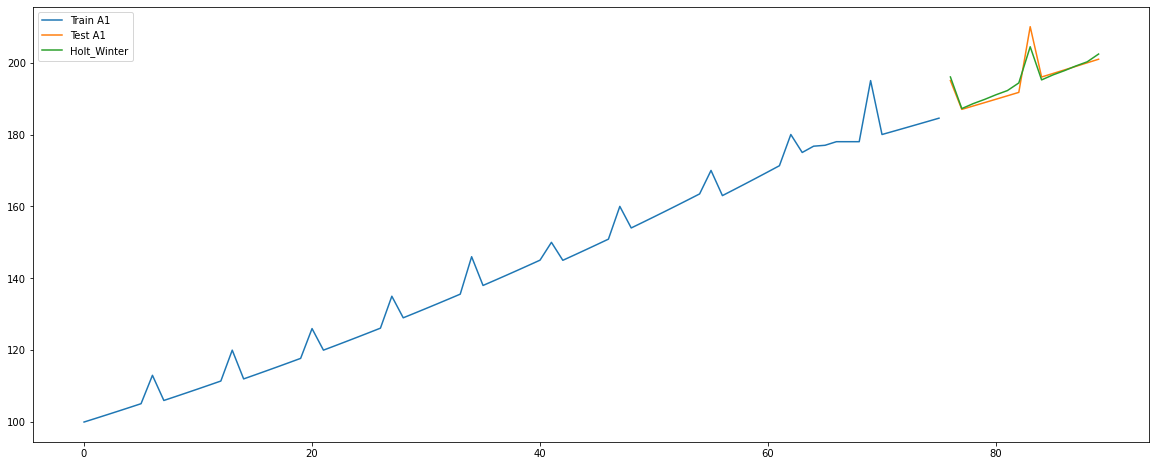

In [47]:
y_hw_A1 = test_A1.copy()
fit1 = ExponentialSmoothing(np.asarray(train_A1['Sales']) ,seasonal_periods=7 ,trend='add', seasonal='multiplicative',).fit()
y_hw_A1['Holt_Winter'] = fit1.forecast(len(test_A1))
plt.figure(figsize=(20,8))
plt.plot(train_A1['Sales'], label='Train A1')
plt.plot(test_A1['Sales'], label='Test A1')
plt.plot(y_hw_A1['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [48]:
print("mae :", mean_absolute_error(test_A1.Sales, y_hw_A1.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test_A1.Sales, y_hw_A1.Holt_Winter)))

mae : 1.2066481377109122
rmse : 1.8316021689106798


Interpretation of results:

- The Mean Absolute Error (MAE) represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

- Root Mean Squared Error (RMSE) is the square root of Mean Squared Error. It measures the standard deviation of residuals.

RMSE penalizes the large prediction errors, such as that of the MAE. However, RMSE is widely used than MSE to evaluate the performance of the regression model with other random models as it has the same units as the target variable (y-axis). Nonetheless, they hold relatively similar information, albeit by different procedures.

The lower value of MAE and RMSE implies higher accuracy of a regression model.

Reference: https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

We are aiming to compare the accuracy among different models. Therefore, RMSE will be used.

Here, we can see that RMSE score is 1.83. Considering that the model will be predicting numbers in the hundreds, for example 200, it would still acceptable for the model to predict lower or higher by 1.83 from that number. This is a simplification on what the RMSE number could represent.

##### ii. SARIMAX

c:\Users\radya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


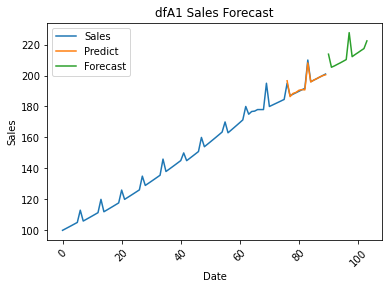

MAE : 0.5255605901154894
RMSE : 0.7757579287577294


In [23]:
model=sm.tsa.statespace.SARIMAX(dfA1['Sales'],order=(1,0,0),seasonal_order=(9,2,14,7))
results = model.fit()
# Creating Prediction and forecast data
dfA1['Predict'] = results.predict(start=76, end=90, dynamic=True)
forecast14 = results.forecast(steps=14)
# Plotting Sales and Prediction
plt.plot(dfA1.index, dfA1['Sales'], label='Sales')
plt.plot(dfA1.index, dfA1['Predict'], label='Predict')
plt.plot(forecast14.index, forecast14, label='Forecast')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('dfA1 Sales Forecast')
plt.legend()
plt.show()
# Printing error evaluation
print("MAE :", mean_absolute_error(dfA1.Sales.iloc[76:90], dfA1.Predict.iloc[76:90]))
print("RMSE :", sqrt(mean_squared_error(dfA1.Sales.iloc[76:90], dfA1.Predict.iloc[76:90])))

The RMSE score using the SARIMAX model is much better than that of Holt-Winters at 0.77.

#### 2. Product A2

##### i. Holt-Winters

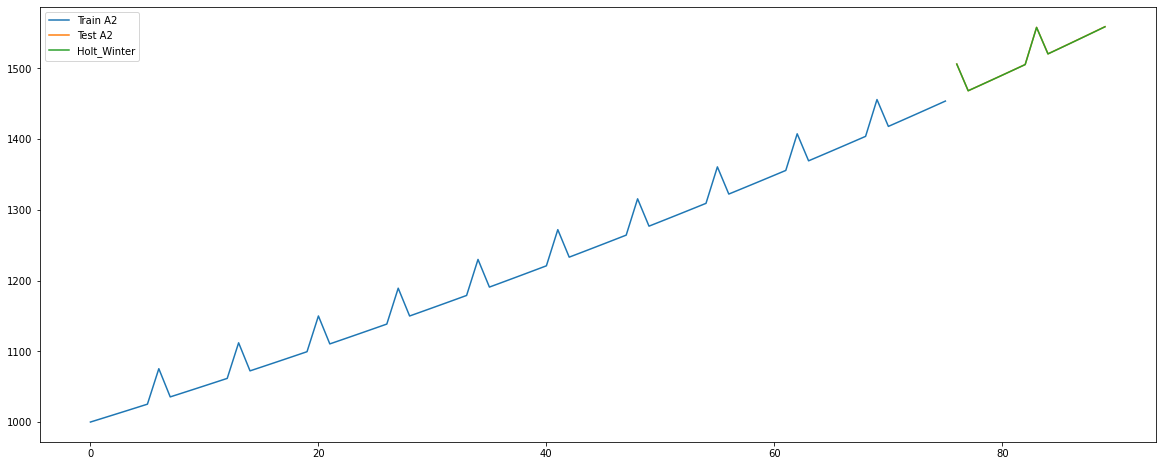

In [204]:
y_hw_A2 = test_A2.copy()
fit1 = ExponentialSmoothing(np.asarray(train_A2['Sales']) ,seasonal_periods=7 ,trend='multiplicative', seasonal='add').fit()
y_hw_A2['Holt_Winter'] = fit1.forecast(len(test_A2))
plt.figure(figsize=(20,8))
plt.plot(train_A2['Sales'], label='Train A2')
plt.plot(test_A2['Sales'], label='Test A2')
plt.plot(y_hw_A2['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [205]:
print("mae :", mean_absolute_error(test_A2.Sales, y_hw_A2.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test_A2.Sales, y_hw_A2.Holt_Winter)))

mae : 0.06354442640827074
rmse : 0.07348849610375177


The RMSE score here is a 0.073, where the predictions is at the thousands.

##### ii. SARIMAX

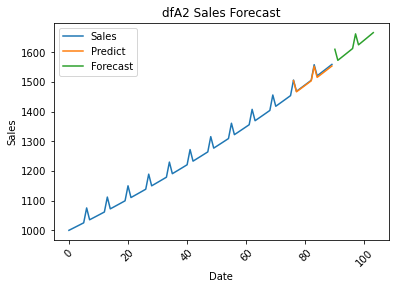

MAE : 3.5225755861205243
RMSE : 3.9455155412903444


In [21]:
model=sm.tsa.statespace.SARIMAX(dfA2['Sales'],order=(1,0,0),seasonal_order=(8,2,0,7))
results = model.fit()
# Creating Prediction and forecast data
dfA2['Predict'] = results.predict(start=76, end=90, dynamic=True)
forecast14 = results.forecast(steps=14)
# Plotting Sales and Prediction
plt.plot(dfA2.index, dfA2['Sales'], label='Sales')
plt.plot(dfA2.index, dfA2['Predict'], label='Predict')
plt.plot(forecast14.index, forecast14, label='Forecast')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('dfA2 Sales Forecast')
plt.legend()
plt.show()
# Printing error evaluation
print("MAE :", mean_absolute_error(dfA2.Sales.iloc[76:90], dfA2.Predict.iloc[76:90]))
print("RMSE :", sqrt(mean_squared_error(dfA2.Sales.iloc[76:90], dfA2.Predict.iloc[76:90])))

The RMSE score is lower of that from the Holt-Winters model, but still at an acceptable 3.94 considering that the predictions will be made in the thousands.

#### 3. Product B1

##### i. Holt-Winters

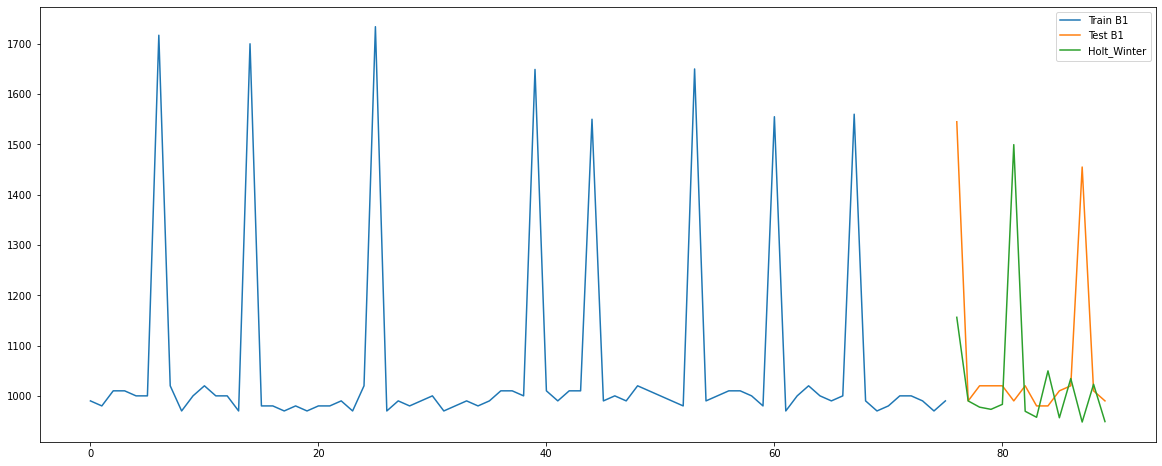

In [214]:
y_hw_B1 = test_B1.copy()
fit1 = ExponentialSmoothing(np.asarray(train_B1['Sales']) ,seasonal_periods=14 ,trend='multiplicative', seasonal='add',).fit()
y_hw_B1['Holt_Winter'] = fit1.forecast(len(test_B1))
plt.figure(figsize=(20,8))
plt.plot(train_B1['Sales'], label='Train B1')
plt.plot(test_B1['Sales'], label='Test B1')
plt.plot(y_hw_B1['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [215]:
print("mae :", mean_absolute_error(test_B1.Sales, y_hw_B1.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test_B1.Sales, y_hw_B1.Holt_Winter)))

mae : 128.3243380691593
rmse : 221.36727561913568


The RMSE score for product B1 using the Holt-Winters model is high at 221, where predictions are made in the thousands. This is unacceptable. 

##### ii. SARIMAX

c:\Users\radya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


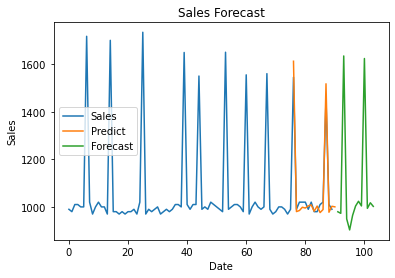

MAE : 27.260544236687192
RMSE : 32.74976903866272


In [22]:
model=sm.tsa.statespace.SARIMAX(dfB1['Sales'],exog=dfB1[['Event']],order=(0,0,0),seasonal_order=(12,1,1,9))
results = model.fit()
# Creating Prediction and forecast data
dfB1['Predict'] = results.predict(start=76, end=90,exog=dfB1[['Event']].iloc[75], dynamic=True)
forecast14= results.predict(start=91,exog=dfB1[['Event']].iloc[90:])
# Plotting Sales and Prediction
plt.plot(dfB1.index, dfB1['Sales'], label='Sales')
plt.plot(dfB1.index, dfB1['Predict'], label='Predict')
plt.plot(forecast14.index, forecast14, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()
# Printing error evaluation
print("MAE :", mean_absolute_error(dfB1.Sales.iloc[76:90], dfB1.Predict.iloc[76:90]))
print("RMSE :", sqrt(mean_squared_error(dfB1.Sales.iloc[76:90], dfB1.Predict.iloc[76:90])))

The RMSE score has improved massively with the SARIMAX model, and is now acceptable at 32.75.

#### 4. Product B2

##### i. Holt-Winters

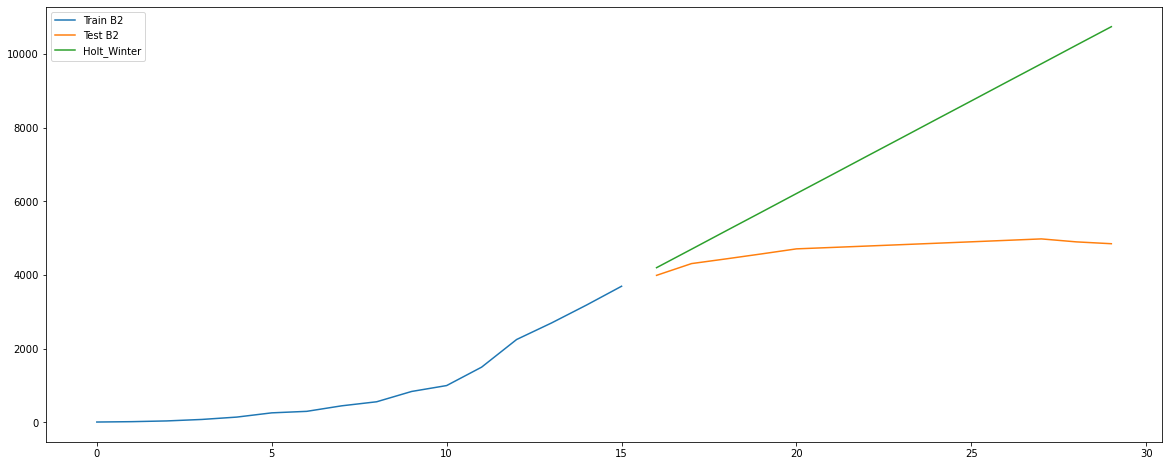

In [28]:
y_hw_B2 = test_B2.copy()
fit1 = ExponentialSmoothing(np.asarray(train_B2['Sales']) ,seasonal_periods=2 ,trend='add', seasonal='add',).fit()
y_hw_B2['Holt_Winter'] = fit1.forecast(len(test_B2))
plt.figure(figsize=(20,8))
plt.plot(train_B2['Sales'], label='Train B2')
plt.plot(test_B2['Sales'], label='Test B2')
plt.plot(y_hw_B2['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [29]:
print("mae :", mean_absolute_error(test_B2.Sales, y_hw_B2.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test_B2.Sales, y_hw_B2.Holt_Winter)))

mae : 2768.7257819676815
rmse : 3302.3277926901683


The RMSE score for product B2 using the Holt-Winters model is horrific at 3302, where predictions are made in the thousands.

##### ii. SARIMAX

c:\Users\radya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


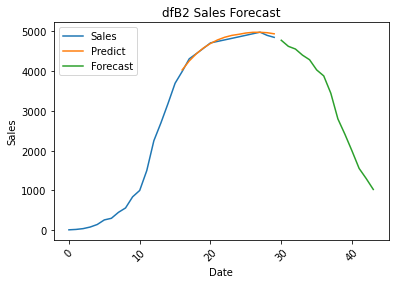

MAE : 43.77778435993845
RMSE : 51.4342600862697


In [27]:
model=sm.tsa.statespace.SARIMAX(dfB2['Sales'],order=(3,1,3),seasonal_order=(3,0,3,26))
results = model.fit()
# Creating Prediction and forecast data
dfB2['Predict'] = results.predict(start=16, end=30, dynamic=True)
forecast14 = results.forecast(steps=14)
# Plotting Sales and Prediction
plt.plot(dfB2.index, dfB2['Sales'], label='Sales')
plt.plot(dfB2.index, dfB2['Predict'], label='Predict')
plt.plot(forecast14.index, forecast14, label='Forecast')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('dfB2 Sales Forecast')
plt.legend()
plt.show()
# Printing error evaluation
print("MAE :", mean_absolute_error(dfB2.Sales.iloc[16:30], dfB2.Predict.iloc[16:30]))
print("RMSE :", sqrt(mean_squared_error(dfB2.Sales.iloc[16:30], dfB2.Predict.iloc[16:30])))

The SARIMAX model gives us an acceptable RMSE score of 51.43.

## IV. Conclusion

To recall, the objective of this notebook is to create a time series model to forecast sales of four different products. The SARIMAX models produce the best results for all products. However, the Holt-Winters model may be a better alternative for Product A2. To summarize:

Product A1:
- Sale numbers at the hundreds
- Holt-Winters RMSE Score is 1.83
- SARIMAX RMSE Score is 0.78

Product A2:
- Sale numbers at the thousands
- Holt-Winters RMSE Score is 0.07
- SARIMAX RMSE Score is 3.95

Product B1:
- Sale numbers at the thousands
- Holt-Winters RMSE Score is 221.37
- SARIMAX RMSE Score is 32.75

Product B2:
- Sale numbers at the thousands
- Holt-Winters RMSE Score is 3302.33
- SARIMAX RMSE Score is 51.43